In [1]:
import os
import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, parent_dir)

import torch
import model_utils
import Plotter
from Frame import Frame
import pickle 
import numpy as np
import Utils
import Plotters

path_to_mesh = 'D:/Documents/model_gaussian_splatting/model/mesh'    
image_path = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov30_2024_11_12_darkan/'
dict_path = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov30_2024_11_12_darkan/frames_model.pkl'


# dict_path = 'D:/Documents/data_for_gs/fly_gray/dict/frames_model.pkl'

with open(dict_path, 'rb') as file:
    data_dict = pickle.load(file)



root,body,right_wing,left_wing,list_joints_pitch_update = model_utils.initilize_skeleton_and_skin(path_to_mesh,skeleton_scale=1/1000)
joint_list,skin,weights,bones = model_utils.build_skeleton(root,body,right_wing,left_wing)


frame = 1524
frames_per_cam = [Frame(image_path,frame,cam_num,frames_dict = data_dict) for cam_num in range(4)]
camera_pixel = np.vstack([frame.camera_center_to_pixel_ray(([frame.cm[0],frame.cm[1]])) for frame in  frames_per_cam])
camera_center = np.vstack([frame.X0.T for frame in  frames_per_cam])
cm_point = Utils.triangulate_least_square(camera_center,camera_pixel)
ew_to_lab = list(data_dict[frame][1].values())[0]['ew_to_lab']
cm_point_lab = torch.tensor(ew_to_lab @ cm_point,device='cuda').float()



    # image_path = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov30_2024_11_12_darkan/'
    # frame = 1447
    # frames_per_cam = [Frame(image_path,frame,cam_num,frames_dict = data_dict) for cam_num in range(4)]
    # camera_pixel = np.vstack([frame.camera_center_to_pixel_ray(([frame.cm[0],frame.cm[1]])) for frame in  frames_per_cam])
    # camera_center = np.vstack([frame.X0.T for frame in  frames_per_cam])
    # cm_point = camera_frame_utils.triangulate_least_square(camera_center,camera_pixel)
    

    #     model['ew_to_lab'] = list(data_dict[frame][1].values())[0]['ew_to_lab']
    #     cm_point_lab = model['ew_to_lab'] @ cm_point
    #     model['wing_body_ini_pose']['body_location_initial'] = cm_point_lab
    #     # model['skin'] = model['skin']
  



Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
path_grads = 'D:/Documents/gaussian_model_output/model_lowres'

with open(f'{path_grads}/xyz_grad.pkl', 'rb') as file:
    xyz_grad = pickle.load(file)

with open(f'{path_grads}/viewspace_point_tensor.pkl', 'rb') as file:
    viewspace_point_tensor = pickle.load(file)


with open(f'{path_grads}/xyz_gradient_accum.pkl', 'rb') as file:
    xyz_gradient_accum = pickle.load(file)
    

In [ ]:
ax.shape

(2, 2)

C:\Users\Roni\AppData\Local\Temp\ipykernel_13840\2439867576.py:17: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



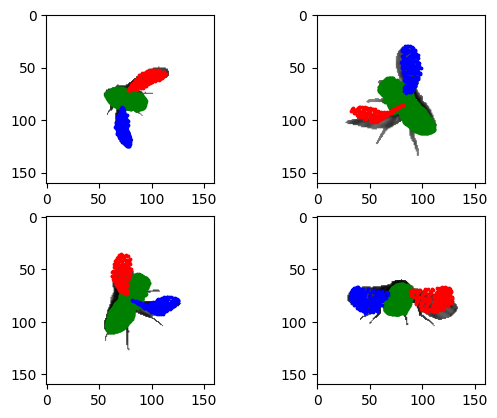

In [85]:
body_angles = torch.tensor([-102,  -38,  10],device='cuda')
right_wing_angles = torch.tensor([39,-66,0.66],device='cuda')
left_wing_angles = torch.tensor([-26,-138,3.6],device='cuda')


body_angles = torch.tensor([-102,  -38,  0],device='cuda')
right_wing_angles = torch.tensor([30,-130,0],device='cuda')
right_wing_angles_center = torch.tensor([0,0,40],device='cuda')

left_wing_angles = torch.tensor([-5,-130,5],device='cuda')
left_wing_angles_center = torch.tensor([0,0,-40],device='cuda')

cm_point_lab_t = cm_point_lab 
means3D = model_utils.transform_pose(skin,weights,body_angles,
                            list_joints_pitch_update,joint_list,bones,cm_point_lab_t,
                            right_wing_angles,left_wing_angles,right_wing_angles_center,left_wing_angles_center)
means3D_ew = torch.tensor(torch.tensor(ew_to_lab.T).cuda().float() @ means3D.T,device='cuda').float().T

body_ew = means3D_ew[:body.ptcloud_skin.shape[0],:]
rw_ew = means3D_ew[body.ptcloud_skin.shape[0]:body.ptcloud_skin.shape[0]+right_wing.ptcloud_skin.shape[0],:]
lw_ew = means3D_ew[body.ptcloud_skin.shape[0]+right_wing.ptcloud_skin.shape[0]:body.ptcloud_skin.shape[0]+right_wing.ptcloud_skin.shape[0] + left_wing.ptcloud_skin.shape[0],:]

ax = Plotters.plot_projections(body_ew[::1,:].cpu(),frames_per_cam, color = 'green')
ax = Plotters.plot_projections(rw_ew[::10,:].cpu(),frames_per_cam, color = 'red', ax = ax)
ax = Plotters.plot_projections(lw_ew[::10,:].cpu(),frames_per_cam, color = 'blue', ax = ax)


In [7]:
ax

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

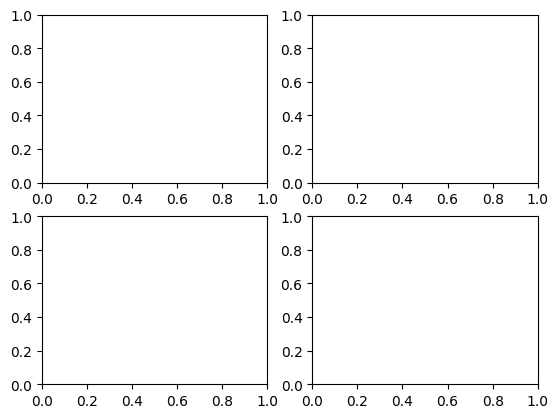

In [8]:
import matplotlib.pyplot as plt
ax = None
fig, ax = (plt.subplots(2, 2) if ax is None else ax)
fig, ax = (plt.subplots(2, 2) if ax is None else ax)


In [61]:
right_wing.ptcloud_skin.shape

torch.Size([1800, 3])

In [66]:
np.column_stack((vertices['x'],vertices['y'],vertices['z']))

array([[ 0.01303583,  0.00985874, -0.00018456],
       [ 0.01311003,  0.01002201, -0.00021738],
       [ 0.01294933,  0.00996891, -0.0001749 ],
       ...,
       [ 0.01458724,  0.00948913, -0.00241   ],
       [ 0.01458477,  0.00950264, -0.00239737],
       [ 0.01447381,  0.00942311, -0.00225042]], dtype=float32)

In [86]:
import Plotter
import plotly.graph_objects as go
import plotly.io as pio
from plyfile import PlyData

pio.renderers.default='browser'


file_name= 'location_try_opacity500_scale13_opacitylr_02_gradth05_sclng005_lowresmesh'
input_file = f'D:/Documents/gaussian_model_output/model_lowres/{frame}/{file_name}/point_cloud/iteration_700/point_cloud.ply'


image_size = frames_per_cam[0].image_size


vertices = PlyData.read(input_file)["vertex"]
vertices = np.column_stack((vertices['x'],vertices['y'],vertices['z']))

vertices_lab = (ew_to_lab @ vertices.T).T


fig = go.Figure()

Plotters.scatter3d(fig,vertices_lab,'red',3,'vol',show_colorbar = False)
fig.show()

Plotter.plot_skeleton(bones,fig,{},{}, name = ['neck_head','neck_thorax','thorax_abdomen','right_wing','right_wing_center','left_wing','left_wing_center'])
Plotter.plot_skin(fig,means3D.cpu(),'skin',skip_skin_points = 1,color = weights[:,-2].cpu(),size = 3)
fig.show()

In [3]:
color = weights/255*torch.tensor([0,0,0,255,255]).cuda()
color = color.sum(1).repeat(3,1).T
fig = go.Figure()
Plotters.scatter3d(fig,means3D.cpu(),color[:,0].cpu().numpy(),3,'vol',show_colorbar = False)
fig.show()


NameError: name 'go' is not defined

In [ ]:
points = bones[3].global_transformation[:,0] + bones[3].global_transformation[:,-1]
torch.matmul(points[0:3],bones[3].bone.direction)

# bones[3].bone.direction

tensor(0.4704, device='cuda:0')

In [205]:
color = weights/255*torch.tensor([0,0,0,150,150]).cuda()
color = color.sum(1).repeat(3,1).T
data_dict[1524][1][496]['ew_to_lab']
bones[3].bone.bone_points


xax = bones[3].global_transformation[:-1,0]
yax = bones[3].global_transformation[:-1,1]
zax = bones[3].global_transformation[:-1,2]


rot_mats = [frames_per_cam[0].rotation_matrix_from_vectors(grad.cpu().detach().numpy(), zax.cpu().detach().numpy()) for grad in grads_lab]


def angles_body(dcm):
    """calculate the yaw, pitch and roll angles that correspond to each rotation matrix in BODY AXES
    ! if you define new rotation order/ axes, the calculation will be different

    Args:
        dcm (np.array): rotation matrix in camera axes

    Returns:
        yaw_z,pitch_y,roll_x (float): angles of rotation
    """

    yaw_z = np.arctan2(dcm[1,0],dcm[0,0])*180/np.pi
    pitch_y = np.arcsin(dcm[2,0])*180/np.pi
    roll_x = np.arctan2(dcm[2,1],dcm[2,2])*180/np.pi
    return yaw_z,pitch_y,roll_x


angles = [angles_body(rot_mat) for rot_mat in rot_mats]

import matplotlib.pyplot as plt
# plt.plot(torch.vstack((psi,theta)).T.cpu().detach())

# plt.plot(theta.cpu().detach(),'*')

rot_mat = frames_per_cam[0].rotation_matrix_from_vectors(mean_grad.cpu().detach().numpy(), zax.cpu().detach().numpy())

print(angles_body(rot_mat))

print(yaw_z,pitch_y,roll_x)


(38.29924729504989, 16.985854768695017, -51.50938296150371)
-2.843383600270869 19.290596534738352 -29.507928134230454


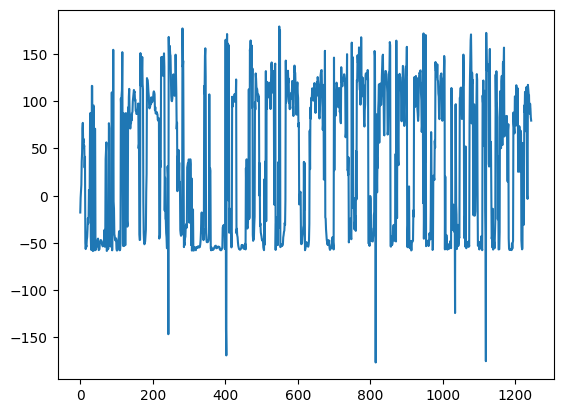

In [213]:
wakk = np.vstack(angles)

plt.plot(wakk[:,0])

In [ ]:
import Plotter
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default='browser'

frames_per_cam[0]

right_wing = weights[:,3] == 1
xyz_gradient_accum_right_wing = xyz_gradient_accum[right_wing]
grad_th = (xyz_gradient_accum_right_wing > 0.0005).flatten()
wing_means = means3D[right_wing,:]
grads = xyz_grad[right_wing,:]

mean_wing = wing_means[grad_th,:].mean(0)


ew_to_lab = data_dict[1524][1][496]['ew_to_lab']

grads_lab = torch.matmul(torch.tensor(ew_to_lab).cuda().float(), grads[grad_th,:].T).T
mean_grad =  grads_lab.mean(0)


fig = go.Figure()
Plotter.plot_skeleton(bones,fig,{},{}, name = ['neck_head','neck_thorax','thorax_abdomen','right_wing','left_wing'])
Plotter.plot_skin(fig,means3D.cpu(),'skin',skip_skin_points = 1,color = color[::1,:].cpu().numpy(),size = 3,colorscale = 'gray')

Plotter.plot_cones(fig, wing_means[grad_th,:].cpu(),grads_lab.cpu(), skip = 1,sizeref = 30)
Plotter.plot_cones(fig, mean_wing[:,None].T.cpu(),mean_grad[:,None].T.cpu(), skip = 1,sizeref = 0.0005)


# Plotter.plot_skin(fig,left_wing.ptcloud_skin.cpu(),'skin',skip_skin_points = 10,color = 'blue',size = 3)
# Plotter.plot_skin(fig,body.ptcloud_skin.cpu(),'skin',skip_skin_points = 10,color = 'green',size = 3)
fig.show()



d:\Documents\model_gaussian_splatting\Plotters.py:69: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



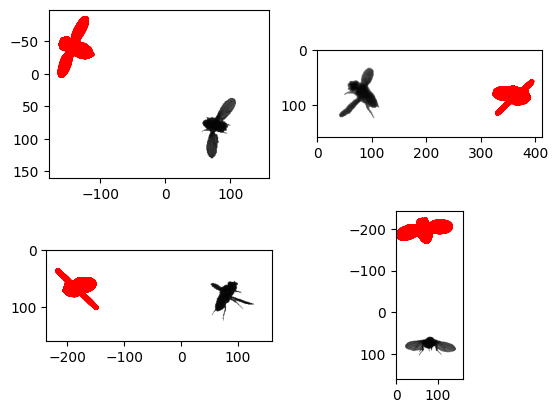

In [18]:

import numpy as np
body_angles = torch.tensor([20,-45,30],device='cuda')
body_location = torch.tensor([1,2,0],device='cuda')/1000
right_wing_angles = torch.tensor([60,45,5],device='cuda')
left_wing_angles = torch.tensor([-60,45,-5],device='cuda')
weights = weights.cuda()

means3D = Utils.transform_pose(skin,weights,body_angles,
                            list_joints_pitch_update,joint_list,bones,body_location,
                            right_wing_angles,left_wing_angles)

fig = go.Figure()
Plotter.plot_skeleton(bones,fig,{},{}, name = ['neck_head','neck_thorax','thorax_abdomen','right_wing','right_wing','left_wing'])
Plotter.plot_skin(fig,means3D.cpu(),'skin',skip_skin_points = 10,color = 'red',size = 3)
fig.show()

AttributeError: module 'Utils' has no attribute 'transform_pose'